# Here C[client fraction]=0.1 and E[local epoch on each client]=5 ,bs[batch size ]=50

In [1]:
import numpy as np
import random
import os
import pickle 
%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer 
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
#tqdm is a package for Python that enables you to instantly 
#create progress bars and estimate TTC (Time To Completion) for your functions and loops!
from tqdm import tqdm
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
#from tensorflow.keras.optimizers.legacy import SGD
from tensorflow.keras import backend as K

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Federated_implementation_utils has been imported 
#from Federated_implementation_utils import *
from Federated_implementation_utils_minmax_cifar import *

In [3]:
X_train = load('X_train.pkl')
X_test=load('X_test.pkl')
y_train=pickle.load(open('y_train.pkl','rb'))
y_test=pickle.load(open('y_test.pkl','rb'))

In [4]:
#see the pickle file
with open('X_train.pkl','rb') as pickle_file: 
    new_data=pickle.load(pickle_file)

new_data[0]

array([[[ 49,  52,  52],
        [ 40,  39,  36],
        [ 61,  48,  36],
        ...,
        [153, 124,  97],
        [149, 121,  96],
        [144, 117,  95]],

       [[ 18,  18,  17],
        [ 20,  10,   2],
        [ 61,  35,  13],
        ...,
        [129,  93,  57],
        [120,  84,  51],
        [116,  80,  49]],

       [[ 32,  23,  15],
        [ 57,  33,  12],
        [ 98,  58,  26],
        ...,
        [128,  89,  51],
        [122,  85,  49],
        [100,  67,  38]],

       ...,

       [[215, 175,  80],
        [194, 150,  24],
        [177, 143,  27],
        ...,
        [176, 145,  90],
        [113,  85,  46],
        [ 39,  22,  10]],

       [[192, 151,  86],
        [189, 145,  33],
        [192, 154,  26],
        ...,
        [140, 106,  62],
        [124,  93,  51],
        [ 69,  43,  25]],

       [[176, 140, 108],
        [174, 135,  81],
        [187, 148,  62],
        ...,
        [171, 139, 102],
        [176, 143, 104],
        [120,  89,  67]]

In [5]:
X_train[0]

array([[[0.19215686, 0.20392157, 0.20392157],
        [0.15686275, 0.15294118, 0.14117647],
        [0.23921569, 0.18823529, 0.14117647],
        ...,
        [0.6       , 0.48627451, 0.38039216],
        [0.58431373, 0.4745098 , 0.37647059],
        [0.56470588, 0.45882353, 0.37254902]],

       [[0.07058824, 0.07058824, 0.06666667],
        [0.07843137, 0.03921569, 0.00784314],
        [0.23921569, 0.1372549 , 0.05098039],
        ...,
        [0.50588235, 0.36470588, 0.22352941],
        [0.47058824, 0.32941176, 0.2       ],
        [0.45490196, 0.31372549, 0.19215686]],

       [[0.1254902 , 0.09019608, 0.05882353],
        [0.22352941, 0.12941176, 0.04705882],
        [0.38431373, 0.22745098, 0.10196078],
        ...,
        [0.50196078, 0.34901961, 0.2       ],
        [0.47843137, 0.33333333, 0.19215686],
        [0.39215686, 0.2627451 , 0.14901961]],

       ...,

       [[0.84313725, 0.68627451, 0.31372549],
        [0.76078431, 0.58823529, 0.09411765],
        [0.69411765, 0

In [6]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_train=y_train.reshape(-1,)

In [9]:
#tolist(), used to convert the data elements of an array into a list. 
#This function returns the array as an a. ndim- levels deep nested list of Python scalars.
labels = list(set(y_train.tolist())) #unique labels
print(labels)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [10]:
n_values = np.max(y_train)+1

'''
numpy.eye(R, C = None, k = 0, dtype = type <‘float’>) : –The eye tool returns a 2-D array with  1’s as the diagonal
and  0’s elsewhere. The diagonal can be main, upper, or lower depending on the optional parameter k. 
A positive k is for the upper diagonal, a negative k is for the lower, and a  0 k (default) is for the main diagonal.
'''
#[[1 0]
# [0 1]] is created and depending upon the class value 0 or 1 0 th or 1st row is selected and stored in label_list
label_list = np.eye(n_values)[y_train]
print(label_list)
#Label_list is changed 1 0 when this means that 0 index should have high probabilty to be classified and 0 1 when 1 index 
#should have high probability to be classified .It is done as because MLP classifier picks up the index of highest probability

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [11]:
y_train=label_list

In [12]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [13]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [14]:
y_test.shape

(10000, 1)

In [15]:
y_test=y_test.reshape(-1,)

In [16]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [17]:
#tolist(), used to convert the data elements of an array into a list. 
#This function returns the array as an a. ndim- levels deep nested list of Python scalars.
labels = list(set(y_test.tolist())) #unique labels
print(labels)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [18]:
n_values = np.max(y_test)+1

'''
numpy.eye(R, C = None, k = 0, dtype = type <‘float’>) : –The eye tool returns a 2-D array with  1’s as the diagonal
and  0’s elsewhere. The diagonal can be main, upper, or lower depending on the optional parameter k. 
A positive k is for the upper diagonal, a negative k is for the lower, and a  0 k (default) is for the main diagonal.
'''
#[[1 0]
# [0 1]] is created and depending upon the class value 0 or 1 0 th or 1st row is selected and stored in label_list
label_list = np.eye(n_values)[y_test]
print(label_list)
#Label_list is changed 1 0 when this means that 0 index should have high probabilty to be classified and 0 1 when 1 index 
#should have high probability to be classified .It is done as because MLP classifier picks up the index of highest probability

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [19]:
y_test=label_list

In [20]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [21]:
#create clients
#Here initial is for client1,client2,....clientK client name 
clients = create_clients_IID(X_train, y_train, num_clients=100, initial='client') 

In [22]:
#clients[:2]

In [23]:
len(clients)

100

In [24]:
#process and batch the training data for each client
#Dictionary of clients is created and the key will be client name and the value will be batched data set batch size is 32
clients_batched = dict()
for (client_name, data) in clients.items():
    #Storing batched data on each client dictionary
    #batch size is 50
    clients_batched[client_name] = batch_data(data,50)

In [25]:
clients_batched

{'client_1': <BatchDataset element_spec=(TensorSpec(shape=(None, 24, 24, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 10), dtype=tf.float64, name=None))>,
 'client_2': <BatchDataset element_spec=(TensorSpec(shape=(None, 24, 24, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 10), dtype=tf.float64, name=None))>,
 'client_3': <BatchDataset element_spec=(TensorSpec(shape=(None, 24, 24, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 10), dtype=tf.float64, name=None))>,
 'client_4': <BatchDataset element_spec=(TensorSpec(shape=(None, 24, 24, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 10), dtype=tf.float64, name=None))>,
 'client_5': <BatchDataset element_spec=(TensorSpec(shape=(None, 24, 24, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 10), dtype=tf.float64, name=None))>,
 'client_6': <BatchDataset element_spec=(TensorSpec(shape=(None, 24, 24, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 10), dtype=tf.float64, name=N

In [26]:
#process and batch the test set  
test_batched = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(len(y_test))

In [27]:
print(test_batched)

<BatchDataset element_spec=(TensorSpec(shape=(None, 24, 24, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 10), dtype=tf.float64, name=None))>


### Creating global model

In [28]:
def create_model():
    global_model = tf.keras.models.Sequential()
    global_model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(24,24,3)))
    global_model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    global_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    global_model.add(tf.keras.layers.Flatten())
    global_model.add(tf.keras.layers.Dense(180, activation='relu'))
    global_model.add(tf.keras.layers.Dense(90, activation='relu'))
    global_model.add(tf.keras.layers.Dense(10, activation='softmax'))
    global_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return global_model

In [29]:
comms_round = 100
E=5
global_model1=create_model()
global_model1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### Enhancing  fedavg through global shared model[GSM Fedavg]

In [30]:
#commence global training loop
#participation ratio of clients at each round
C=0.1
X_com=[]
Y_acc_avg_up=[]
Y_loss_avg_up=[]
Y_acc_avg=[]
Y_loss_avg=[]

for comm_round in range(comms_round):
    
    # get the global model's weights - will serve as the initial weights for all local models
    #This function returns a list consisting of NumPy arrays. The first array gives the weights of the layer and 
    #the second array gives the biases.
    global_weights1= global_model1.get_weights()
    #initial list to collect local model weights after scalling
    scaled_local_weight_list1 = list()
    #randomize client data - using keys
    client_names= list(clients_batched.keys()) #Here client name has been stored in client_names
    random.shuffle(client_names)
    client_names=client_names[0:int(max(C*len(clients),1))]
    
    #loop through each client and create new local model
    for client in tqdm(client_names , desc = 'Progress Bar'):
        #time.sleep(0.5)
        local_model1 = global_model1
        
        #set local model weight to the weight of the global model
        #local_model.set_weights(global_weights)
        
        # get the batched data for the client
        client_data = clients_batched[client]
        
        # get the number of batches in the client's data
        num_batches = tf.data.experimental.cardinality(client_data)
            
        for batch in client_data:
            X, y = batch
            bs = len(X)
            local_model1.fit(X, y, epochs=E, verbose=0, batch_size=bs)
            
        #scale the model weights and add to list
        scaling_factor = weight_scalling_factor(clients_batched, client,client_names)
        #Now each attributes weights has been multiplied by scalling factor for each client
        scaled_weights1 = scale_model_weights(local_model1.get_weights(), scaling_factor)
        #scaled weight list now stored for each client
        scaled_local_weight_list1.append(scaled_weights1)
        #clear session to free memory after each communication round
        K.clear_session()
        
    #to get the average over all the local model, we simply take the sum of the scaled weights
    average_weights1 = sum_scaled_weights(scaled_local_weight_list1)
        
    #update global model 
    global_model1.set_weights(average_weights1)

    #test global model and print out metrics after each communications round
    for(X_test, Y_test) in test_batched:
        print('Fedavg:')
        global_acc, global_loss = test_model(X_test, Y_test, global_model1,comm_round)
        X_com.append(comm_round)
        Y_acc_avg_up.append(global_acc)
        Y_loss_avg_up.append(global_loss)

Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:25<00:00,  2.57s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 0 | global_acc: 23.730% | global_loss: 2.2816200256347656


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:21<00:00,  2.16s/it]


Fedavg:
313/313 [==============================] - 3s 8ms/step
comm_round: 1 | global_acc: 29.080% | global_loss: 2.234252691268921


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:22<00:00,  2.30s/it]


Fedavg:
313/313 [==============================] - 6s 6ms/step
comm_round: 2 | global_acc: 33.070% | global_loss: 2.2114992141723633


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:25<00:00,  2.59s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 3 | global_acc: 35.090% | global_loss: 2.1878387928009033


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:21<00:00,  2.13s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 4 | global_acc: 37.730% | global_loss: 2.1698765754699707


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:28<00:00,  2.86s/it]


Fedavg:
313/313 [==============================] - 2s 8ms/step
comm_round: 5 | global_acc: 41.290% | global_loss: 2.1456778049468994


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:22<00:00,  2.26s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 6 | global_acc: 42.750% | global_loss: 2.1301567554473877


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:24<00:00,  2.46s/it]


Fedavg:
313/313 [==============================] - 2s 5ms/step
comm_round: 7 | global_acc: 43.970% | global_loss: 2.1047933101654053


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:33<00:00,  3.35s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 8 | global_acc: 45.250% | global_loss: 2.0933377742767334


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:28<00:00,  2.82s/it]


Fedavg:
313/313 [==============================] - 5s 15ms/step
comm_round: 9 | global_acc: 45.770% | global_loss: 2.0773532390594482


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:36<00:00,  3.66s/it]


Fedavg:
313/313 [==============================] - 3s 8ms/step
comm_round: 10 | global_acc: 47.470% | global_loss: 2.070577383041382


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:28<00:00,  2.81s/it]


Fedavg:
313/313 [==============================] - 3s 8ms/step
comm_round: 11 | global_acc: 48.250% | global_loss: 2.0594842433929443


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.60s/it]


Fedavg:
313/313 [==============================] - 2s 7ms/step
comm_round: 12 | global_acc: 48.450% | global_loss: 2.05338978767395


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:25<00:00,  2.54s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 13 | global_acc: 49.680% | global_loss: 2.04290771484375


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:25<00:00,  2.58s/it]


Fedavg:
313/313 [==============================] - 2s 7ms/step
comm_round: 14 | global_acc: 50.120% | global_loss: 2.0347518920898438


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:29<00:00,  2.94s/it]


Fedavg:
313/313 [==============================] - 2s 7ms/step
comm_round: 15 | global_acc: 50.970% | global_loss: 2.027512550354004


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:23<00:00,  2.35s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 16 | global_acc: 51.870% | global_loss: 2.021228551864624


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:22<00:00,  2.23s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 17 | global_acc: 52.260% | global_loss: 2.016460418701172


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:22<00:00,  2.24s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 18 | global_acc: 52.800% | global_loss: 2.0043797492980957


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:22<00:00,  2.23s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 19 | global_acc: 53.760% | global_loss: 2.0021770000457764


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:21<00:00,  2.15s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 20 | global_acc: 53.850% | global_loss: 1.9903656244277954


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:21<00:00,  2.18s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 21 | global_acc: 54.430% | global_loss: 1.9894734621047974


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:30<00:00,  3.04s/it]


Fedavg:
313/313 [==============================] - 2s 7ms/step
comm_round: 22 | global_acc: 54.670% | global_loss: 1.9851261377334595


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:24<00:00,  2.48s/it]


Fedavg:
313/313 [==============================] - 2s 5ms/step
comm_round: 23 | global_acc: 54.620% | global_loss: 1.980840802192688


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:21<00:00,  2.14s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 24 | global_acc: 55.490% | global_loss: 1.9724377393722534


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:22<00:00,  2.27s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 25 | global_acc: 55.560% | global_loss: 1.971245288848877


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.79s/it]


Fedavg:
313/313 [==============================] - 2s 8ms/step
comm_round: 26 | global_acc: 55.170% | global_loss: 1.967731237411499


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:26<00:00,  2.65s/it]


Fedavg:
313/313 [==============================] - 2s 8ms/step
comm_round: 27 | global_acc: 56.240% | global_loss: 1.9566246271133423


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:24<00:00,  2.44s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 28 | global_acc: 56.160% | global_loss: 1.9522178173065186


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:24<00:00,  2.47s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 29 | global_acc: 55.710% | global_loss: 1.9556492567062378


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:21<00:00,  2.11s/it]


Fedavg:
313/313 [==============================] - 2s 7ms/step
comm_round: 30 | global_acc: 56.860% | global_loss: 1.9457136392593384


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:21<00:00,  2.13s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 31 | global_acc: 57.060% | global_loss: 1.9413362741470337


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:22<00:00,  2.23s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 32 | global_acc: 57.760% | global_loss: 1.9374101161956787


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:21<00:00,  2.18s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 33 | global_acc: 57.210% | global_loss: 1.9374537467956543


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:21<00:00,  2.12s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 34 | global_acc: 58.240% | global_loss: 1.931100606918335


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:22<00:00,  2.29s/it]


Fedavg:
313/313 [==============================] - 2s 7ms/step
comm_round: 35 | global_acc: 58.360% | global_loss: 1.9254109859466553


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:19<00:00,  1.96s/it]


Fedavg:
313/313 [==============================] - 2s 5ms/step
comm_round: 36 | global_acc: 59.030% | global_loss: 1.9188663959503174


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:19<00:00,  1.96s/it]


Fedavg:
313/313 [==============================] - 2s 5ms/step
comm_round: 37 | global_acc: 58.680% | global_loss: 1.9193724393844604


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:19<00:00,  1.97s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 38 | global_acc: 58.430% | global_loss: 1.9238532781600952


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:20<00:00,  2.01s/it]


Fedavg:
313/313 [==============================] - 2s 7ms/step
comm_round: 39 | global_acc: 59.080% | global_loss: 1.913922667503357


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:19<00:00,  1.96s/it]


Fedavg:
313/313 [==============================] - 2s 7ms/step
comm_round: 40 | global_acc: 59.160% | global_loss: 1.9124191999435425


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:19<00:00,  1.98s/it]


Fedavg:
313/313 [==============================] - 2s 5ms/step
comm_round: 41 | global_acc: 58.630% | global_loss: 1.9117921590805054


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:20<00:00,  2.07s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 42 | global_acc: 59.320% | global_loss: 1.9065648317337036


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:19<00:00,  1.92s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 43 | global_acc: 59.560% | global_loss: 1.9082363843917847


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:19<00:00,  1.92s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 44 | global_acc: 59.340% | global_loss: 1.90413498878479


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:19<00:00,  1.92s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 45 | global_acc: 59.890% | global_loss: 1.9010519981384277


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:19<00:00,  1.92s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 46 | global_acc: 59.760% | global_loss: 1.8979119062423706


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:19<00:00,  1.91s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 47 | global_acc: 59.450% | global_loss: 1.8989884853363037


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:19<00:00,  1.90s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 48 | global_acc: 59.870% | global_loss: 1.8984215259552002


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:19<00:00,  1.91s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 49 | global_acc: 60.270% | global_loss: 1.8945034742355347


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:19<00:00,  1.94s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 50 | global_acc: 60.450% | global_loss: 1.8915791511535645


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:19<00:00,  1.91s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 51 | global_acc: 59.860% | global_loss: 1.8926726579666138


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:19<00:00,  1.93s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 52 | global_acc: 60.370% | global_loss: 1.8871017694473267


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:20<00:00,  2.03s/it]


Fedavg:
313/313 [==============================] - 2s 7ms/step
comm_round: 53 | global_acc: 60.800% | global_loss: 1.8844929933547974


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:22<00:00,  2.22s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 54 | global_acc: 60.530% | global_loss: 1.8845347166061401


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:19<00:00,  1.94s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 55 | global_acc: 60.930% | global_loss: 1.8824222087860107


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:19<00:00,  1.96s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 56 | global_acc: 61.200% | global_loss: 1.881210207939148


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:20<00:00,  2.00s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 57 | global_acc: 61.040% | global_loss: 1.8818527460098267


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:21<00:00,  2.12s/it]


Fedavg:
313/313 [==============================] - 2s 7ms/step
comm_round: 58 | global_acc: 61.410% | global_loss: 1.8732622861862183


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:20<00:00,  2.05s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 59 | global_acc: 61.250% | global_loss: 1.880266785621643


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:20<00:00,  2.03s/it]


Fedavg:
313/313 [==============================] - 2s 7ms/step
comm_round: 60 | global_acc: 60.980% | global_loss: 1.8776167631149292


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:20<00:00,  2.07s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 61 | global_acc: 61.250% | global_loss: 1.8728468418121338


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:19<00:00,  1.96s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 62 | global_acc: 61.330% | global_loss: 1.872310996055603


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:20<00:00,  2.10s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 63 | global_acc: 60.820% | global_loss: 1.874997615814209


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:21<00:00,  2.15s/it]


Fedavg:
313/313 [==============================] - 2s 7ms/step
comm_round: 64 | global_acc: 61.350% | global_loss: 1.8722140789031982


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:21<00:00,  2.19s/it]


Fedavg:
313/313 [==============================] - 2s 7ms/step
comm_round: 65 | global_acc: 61.190% | global_loss: 1.8746273517608643


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:20<00:00,  2.09s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 66 | global_acc: 61.370% | global_loss: 1.8703162670135498


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:21<00:00,  2.11s/it]


Fedavg:
313/313 [==============================] - 2s 7ms/step
comm_round: 67 | global_acc: 61.840% | global_loss: 1.8669641017913818


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:22<00:00,  2.27s/it]


Fedavg:
313/313 [==============================] - 2s 7ms/step
comm_round: 68 | global_acc: 61.420% | global_loss: 1.8683515787124634


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:21<00:00,  2.14s/it]


Fedavg:
313/313 [==============================] - 2s 7ms/step
comm_round: 69 | global_acc: 61.920% | global_loss: 1.8632537126541138


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:22<00:00,  2.21s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 70 | global_acc: 61.910% | global_loss: 1.8699980974197388


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:22<00:00,  2.28s/it]


Fedavg:
313/313 [==============================] - 2s 7ms/step
comm_round: 71 | global_acc: 62.070% | global_loss: 1.8626999855041504


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:22<00:00,  2.23s/it]


Fedavg:
313/313 [==============================] - 2s 7ms/step
comm_round: 72 | global_acc: 62.010% | global_loss: 1.8604862689971924


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:21<00:00,  2.15s/it]


Fedavg:
313/313 [==============================] - 2s 7ms/step
comm_round: 73 | global_acc: 62.140% | global_loss: 1.8574738502502441


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:22<00:00,  2.21s/it]


Fedavg:
313/313 [==============================] - 2s 7ms/step
comm_round: 74 | global_acc: 62.720% | global_loss: 1.8574340343475342


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:22<00:00,  2.27s/it]


Fedavg:
313/313 [==============================] - 2s 7ms/step
comm_round: 75 | global_acc: 62.870% | global_loss: 1.8569470643997192


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:22<00:00,  2.28s/it]


Fedavg:
313/313 [==============================] - 2s 7ms/step
comm_round: 76 | global_acc: 62.650% | global_loss: 1.8593088388442993


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:22<00:00,  2.27s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 77 | global_acc: 62.450% | global_loss: 1.8544585704803467


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:23<00:00,  2.31s/it]


Fedavg:
313/313 [==============================] - 2s 8ms/step
comm_round: 78 | global_acc: 61.720% | global_loss: 1.8602070808410645


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:23<00:00,  2.37s/it]


Fedavg:
313/313 [==============================] - 2s 7ms/step
comm_round: 79 | global_acc: 62.540% | global_loss: 1.855621099472046


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:23<00:00,  2.34s/it]


Fedavg:
313/313 [==============================] - 2s 7ms/step
comm_round: 80 | global_acc: 62.590% | global_loss: 1.8568583726882935


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:23<00:00,  2.33s/it]


Fedavg:
313/313 [==============================] - 2s 7ms/step
comm_round: 81 | global_acc: 62.260% | global_loss: 1.8563193082809448


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:21<00:00,  2.12s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 82 | global_acc: 62.760% | global_loss: 1.8563721179962158


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:20<00:00,  2.06s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 83 | global_acc: 62.410% | global_loss: 1.8524812459945679


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:21<00:00,  2.11s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 84 | global_acc: 62.740% | global_loss: 1.8513211011886597


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:24<00:00,  2.41s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 85 | global_acc: 62.300% | global_loss: 1.8519392013549805


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:24<00:00,  2.44s/it]


Fedavg:
313/313 [==============================] - 2s 7ms/step
comm_round: 86 | global_acc: 62.920% | global_loss: 1.853255271911621


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:24<00:00,  2.41s/it]


Fedavg:
313/313 [==============================] - 3s 8ms/step
comm_round: 87 | global_acc: 63.180% | global_loss: 1.8484853506088257


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:23<00:00,  2.38s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 88 | global_acc: 62.910% | global_loss: 1.8526427745819092


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:26<00:00,  2.60s/it]


Fedavg:
313/313 [==============================] - 2s 7ms/step
comm_round: 89 | global_acc: 62.800% | global_loss: 1.8493359088897705


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:22<00:00,  2.24s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 90 | global_acc: 63.160% | global_loss: 1.84773850440979


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:20<00:00,  2.01s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 91 | global_acc: 63.440% | global_loss: 1.845346450805664


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:21<00:00,  2.14s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 92 | global_acc: 62.920% | global_loss: 1.8512179851531982


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:23<00:00,  2.40s/it]


Fedavg:
313/313 [==============================] - 2s 5ms/step
comm_round: 93 | global_acc: 63.090% | global_loss: 1.850061297416687


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:21<00:00,  2.18s/it]


Fedavg:
313/313 [==============================] - 2s 7ms/step
comm_round: 94 | global_acc: 63.070% | global_loss: 1.8480398654937744


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:25<00:00,  2.59s/it]


Fedavg:
313/313 [==============================] - 2s 7ms/step
comm_round: 95 | global_acc: 62.820% | global_loss: 1.850721836090088


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:25<00:00,  2.52s/it]


Fedavg:
313/313 [==============================] - 2s 7ms/step
comm_round: 96 | global_acc: 62.980% | global_loss: 1.8463562726974487


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:24<00:00,  2.50s/it]


Fedavg:
313/313 [==============================] - 2s 7ms/step
comm_round: 97 | global_acc: 63.200% | global_loss: 1.846519112586975


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:23<00:00,  2.32s/it]


Fedavg:
313/313 [==============================] - 2s 7ms/step
comm_round: 98 | global_acc: 62.980% | global_loss: 1.8436193466186523


Progress Bar: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:22<00:00,  2.30s/it]


Fedavg:
313/313 [==============================] - 2s 6ms/step
comm_round: 99 | global_acc: 63.300% | global_loss: 1.8423453569412231


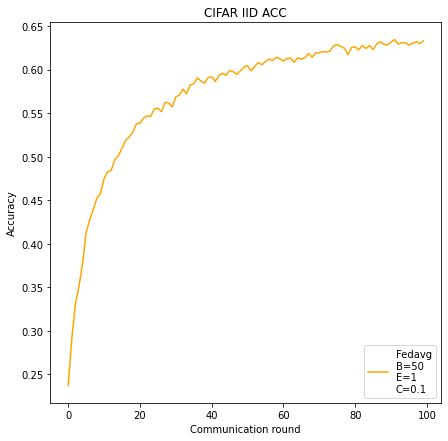

In [34]:
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(7)
plt.plot(X_com,Y_acc_avg_up,color='orange')
plt.title('CIFAR IID ACC')
plt.ylabel('Accuracy')
plt.xlabel('Communication round')
plt.legend(['Fedavg\nB=50\nE=1\nC=0.1'],loc='lower right')
plt.show()

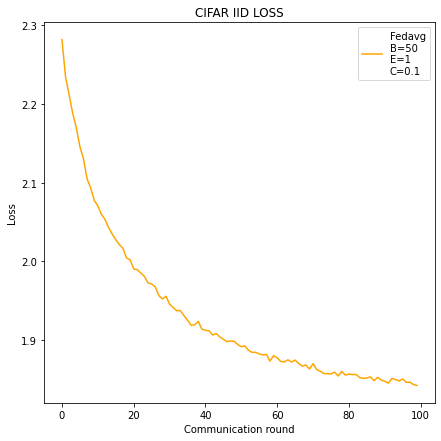

In [35]:
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(7)
plt.plot(X_com,Y_loss_avg_up,color='orange')
plt.title('CIFAR IID LOSS')
plt.ylabel('Loss')
plt.xlabel('Communication round')
plt.legend(['Fedavg\nB=50\nE=1\nC=0.1'],loc='upper right')
plt.show()